# ANKIT KUMAR- Decision Tree & Random Forest Classifier-CAR_EVALUATION DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  Data Exploration:

In [2]:
# Reload the CSV with column names
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(r'D:\Downloads\car_evaluation.csv', names=column_names, header=None)

# Check the first few rows
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.describe

<bound method NDFrame.describe of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]>

In [4]:
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
# Data Exploration
print("Dataset Info:")
df.info()

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

Unique values per column:
buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


# Data Preprocessing:

**All six features from the Car Evaluation dataset were selected for training the classification models**. These features are:

buying – Buying price of the car

maint – Maintenance cost

doors – Number of doors

persons – Capacity in terms of persons

lug_boot – Luggage boot size

safety – Safety rating

**Reason for Selecting All Features:**

>The dataset is small and does not contain redundant or irrelevant columns.

>All six features are directly related to the evaluation of a car, covering economic, physical, and safety aspects.

>Since all features are categorical and low-dimensional, there is no risk of high dimensionality or overfitting due to irrelevant features.

>Based on feature importance analysis (from Decision Tree and Random Forest), features like safety, persons, and buying show a high impact on the target variable, supporting their inclusion.

Therefore, all available features were retained as they contribute meaningful information toward classifying car evaluation levels.

In [6]:
# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [7]:
# Split features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree Implementation:

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)


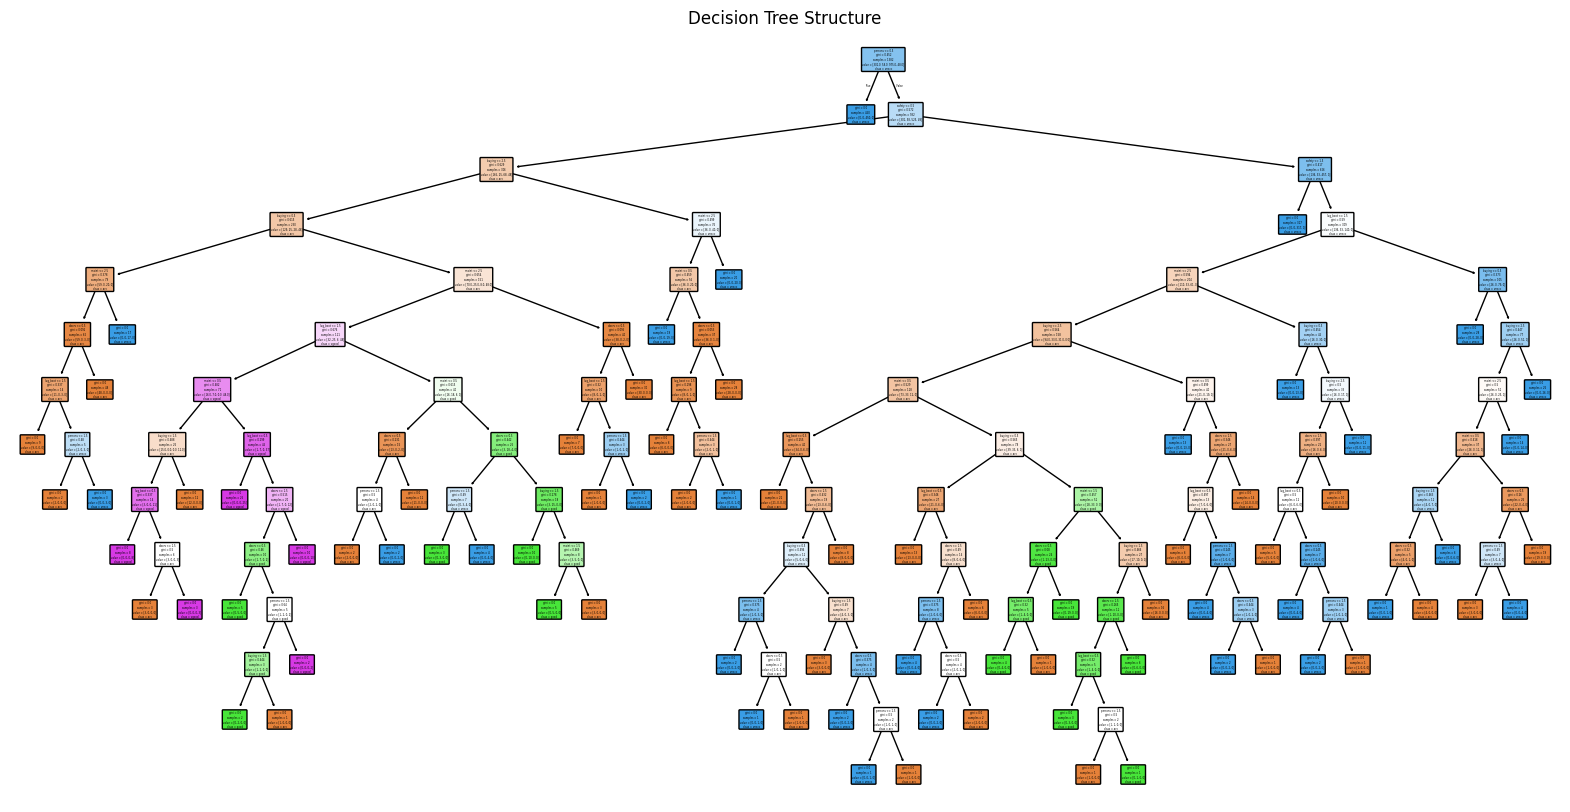

In [9]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


 # Splitting Criteria and Tree Structure Explanation
**📌 Splitting Criteria:**
>The Decision Tree classifier uses Gini Impurity as the default criterion for splitting.

>At each node, it selects the feature and threshold that minimizes the weighted Gini Impurity of the child nodes.

>This means the algorithm prefers splits that make each subgroup purer (i.e., more homogenous in terms of class labels).

**🌳 Tree Structure Analysis:**
Root Node:

>The tree starts with the most informative feature — often safety, persons, or buying, depending on how the training set is encoded.

>In your image, it appears that safety or persons could be playing key roles early in the tree (judging by frequent branching).

Intermediate Nodes:

>These nodes represent feature-value splits that further divide the dataset into smaller subsets.

>For instance, one path might split based on persons ≤ 2, which could indicate low acceptability for small-capacity cars.

Leaf Nodes:

>The leaf nodes (bottom of the tree) assign the final class prediction (e.g., unacc, acc, good, vgood).

>These nodes show the most common class label in that segment of the data.

**✨ Key Decisions Made by the Algorithm:**

>High priority is given to safety and capacity (persons), which makes sense:

>Cars with low safety ratings are often classified as unacc regardless of other features.

>Cars with low person capacity also often lead to rejection.

>Features like luggage size (lug_boot) or number of doors (doors) are used in deeper branches, showing they are less influential than safety or capacity but still contribute.

**🧠 Why It Matters:**

>The Decision Tree helps us understand the logical flow of decision-making.

>For example:

>If a car has high safety and can carry 4+ persons, it’s likely to be classified as acc or good.

>If safety is low, the car is almost always classified as unacc, regardless of other attributes.

# Random Forest Implementation:

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Differences in Classification Approach
**🌳 Decision Tree:**
>Makes decisions based on a single tree structure.

>Once trained, the model always follows exact same path for a given input.

>Highly sensitive to changes in data; small variations can drastically change the tree.

**🌲 Random Forest:**
>Builds multiple decision trees, each trained on a random subset of the data and features.

>Each tree casts a "vote", and the final prediction is based on majority voting.

>Reduces variance and improves generalization, making it more robust to noise and overfitting.

# Model Comparison

**Evaluation**

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Scores
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Reports
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.9739884393063584
Random Forest Accuracy: 0.9739884393063584

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346


Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       3

**Accuracy (Overall Performance)**

Decision Tree Accuracy: 97.40%

Random Forest Accuracy: 97.40%

Conclusion: Both models have the same accuracy, but that's just one metric.

**Precision, Recall, and F1-Score (Detailed Performance)**

Observation:

>Class 1 (which might be underrepresented) is better classified by Random Forest (F1-score 0.79 vs 0.74).

>For other classes, performance is very similar or marginally better in Random Forest.



**Macro & Weighted Averages**

Conclusion:
>Random Forest has better macro average scores, meaning it's slightly better at treating all classes equally — especially important if classes are imbalanced.




**Which Model is Better and Why?**

>**Random Forest performs slightly better overall**, especially in:

>Handling the minority class (Class 1) more effectively.

>Generalizing better across all classes (higher macro averages).

>Being more robust to overfitting due to its ensemble nature.

Although both models perform very similarly on this dataset, **Random Forest provides more stability and balanced performance**, making it the better choice in most practical applications.



In [14]:
# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [15]:
# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

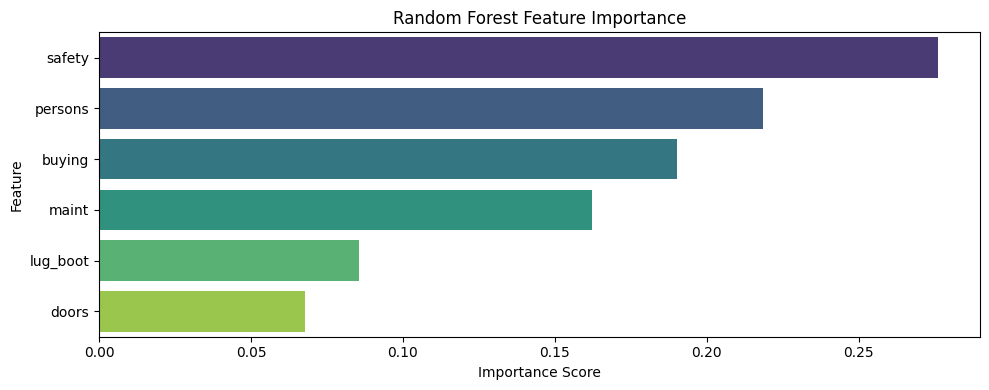

In [16]:
# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Interpretation of Key Features

1.  Safety (Highest Importance)
>Most influential feature in classification.

>Cars with higher safety ratings (e.g., “high” or “very high”) are much more likely to be classified as acceptable or good.

>Reflects real-world priorities, where buyers heavily value occupant safety.

2.  Persons (Seating Capacity)
>Second most important.

>Indicates how many people the car can accommodate.

>Cars with higher seating capacity (e.g., 4 or more persons) are typically rated more favorably, especially for family use.

3.  Buying Price
>Shows how cost influences classification.

>Cheaper cars might be more acceptable if they also have good safety or other practical features.

>Expensive cars might be marked less acceptable if not balanced by other strong attributes (like safety or maintenance cost).

4.  Maintenance Cost (maint)
>Affects long-term affordability.

>High maintenance cost likely reduces a car’s overall acceptability.

>Balanced importance: Not dominant, but still considered significantly in decisions.

5. Lug Boot (Storage Capacity)
>Reflects storage size for cargo/luggage.

>Important for buyers looking for utility.

>Lower importance suggests it plays a supporting role in decisions.

6.  Doors
>Least influential feature.

>Variability in door count (e.g., 2, 3, 4, 5 doors) doesn't strongly influence the acceptability classification.

>Likely because doors impact aesthetics/practicality less than safety or cost.

**Conclusion**
>Random Forest identifies **safety, lug_boot, and persons as the strongest predictors**. These features align with real-world car evaluation priorities — a well-aligned model!

# THE END